## EDA of Datasets

https://steinhardt.nyu.edu/research-alliance/research/spotlight-nyc-schools/how-have-nycs-high-school-graduation-and-college

https://www.the74million.org/article/adams-covid-19-learning-loss-will-be-devastating-for-nyc-students-but-the-school-system-will-come-out-looking-just-fine/

https://ny.chalkbeat.org/2021/1/14/22230843/nyc-graduation-rates-up-2020

http://www.nysed.gov/common/nysed/files/programs/main/grad-rate-data-slides-2016-cohort.pdf

https://infohub.nyced.org/docs/default-source/default-document-library/2020-graduation-rates-website-deck.pdf

https://infohub.nyced.org/docs/default-source/default-document-library/regents-exam-waiver-guidance.pdf


In [1]:
import os
import ssl
import sys
import urllib.request
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns', None)

#### Read in Datasets

In [2]:
grads = pd.read_csv('data/clean/all_grad_rates.csv', )
sqr = pd.read_csv('data/clean/sqr.csv')
lcgms = pd.read_csv('data/clean/lcgms.csv')
demo = pd.read_csv('data/clean/demo.csv')

In [3]:
lcgms.groupby(['desc', 'type']).count()

zip  boroughBlockLot  \
desc                            type                                      
District Pre-K Center           General Academic    18               18   
Early Childhood                 General Academic    12               12   
Elementary                      General Academic   728              727   
                                Special Education    2                2   
High school                     Career Technical    46               46   
                                General Academic   313              313   
                                Special Education    9                9   
                                Transfer School     58               58   
Junior High-Intermediate-Middle General Academic   289              289   
K-12 all grades                 General Academic    34               34   
                                Home School          1                1   
                                Special Education   30               30   
K-8                             General Academic   216              216   
                                Special Education   13               13   
Secondary School                General Academic    93               93   
                                Special Education    7                7   
Ungraded                        Special Education    2                2   

                                                   censusTract  geoDis  dbn  
desc                            type                                         
District Pre-K Center           General Academic            18      18   18  
Early Childhood                 General Academic            12      12   12  
Elementary                      General Academic           727     728  728  
                                Special Education            2       2    2  
High school                     Career Technical            46      46   46  
                                General Academic           313     313  313  
                                Special Education            9       9    9  
                                Transfer School             58      58   58  
Junior High-Intermediate-Middle General Academic           289     289  289  
K-12 all grades                 General Academic            34      34   34  
                                Home School                  1       1    1  
                                Special Education           29      30   30  
K-8                             General Academic           216     216  216  
                                Special Education           13      13   13  
Secondary School                General Academic            93      93   93  
                                Special Education            7       7    7  
Ungraded                        Special Education            2       2    2

#### EDA Grads Data

In [4]:
grads = grads.merge(lcgms[['dbn', 'geoDis', 'type', 'desc','censusTract']], right_on='dbn', left_on='dbn')

In [5]:
grads['sqrYear'] = grads['cohortYear']+4
grads = grads[grads['cohort'] == '4 year August']
grads['adminDis'] = grads['dbn'].str[:2]

In [6]:
grads.head()

,dbn,schoolName,cohortYear,cohort,numTotalCohort,numGrads,pctGrad,geoDis,type,desc,censusTract,sqrYear,adminDis
0,01M292,ORCHARD COLLEGIATE ACADEMY,2016,4 year August,31,29.0,0.935484,1,General Academic,High school,201.0,2020,01
1,01M292,ORCHARD COLLEGIATE ACADEMY,2015,4 year August,28,25.0,0.892857,1,General Academic,High school,201.0,2019,01
2,01M292,ORCHARD COLLEGIATE ACADEMY,2014,4 year August,29,28.0,0.965517,1,General Academic,High school,201.0,2018,01
3,01M292,ORCHARD COLLEGIATE ACADEMY,2013,4 year August,36,25.0,0.694444,1,General Academic,High school,201.0,2017,01
4,01M292,ORCHARD COLLEGIATE ACADEMY,2012,4 year August,44,24.0,0.545455,1,General Academic,High school,201.0,2016,01


In [7]:
grads[grads['cohortYear']==2016].groupby(['cohortYear', 'desc', 'type']).count()

dbn  schoolName  cohort  \
cohortYear desc             type                                         
2016       High school      Career Technical    46          46      46   
                            General Academic   308         308     308   
                            Special Education    1           1       1   
                            Transfer School     58          58      58   
           K-12 all grades  General Academic    28          28      28   
           Secondary School General Academic    87          87      87   
           Ungraded         Special Education    1           1       1   

                                               numTotalCohort  numGrads  \
cohortYear desc             type                                          
2016       High school      Career Technical               46        46   
                            General Academic              308       307   
                            Special Education               1         1   
                            Transfer School                58        58   
           K-12 all grades  General Academic               28        25   
           Secondary School General Academic               87        86   
           Ungraded         Special Education               1         0   

                                               pctGrad  geoDis  censusTract  \
cohortYear desc             type                                              
2016       High school      Career Technical        46      46           46   
                            General Academic       307     308          308   
                            Special Education        1       1            1   
                            Transfer School         58      58           58   
           K-12 all grades  General Academic        25      28           28   
           Secondary School General Academic        86      87           87   
           Ungraded         Special Education        0       1            1   

                                               sqrYear  adminDis  
cohortYear desc             type                                  
2016       High school      Career Technical        46        46  
                            General Academic       308       308  
                            Special Education        1         1  
                            Transfer School         58        58  
           K-12 all grades  General Academic        28        28  
           Secondary School General Academic        87        87  
           Ungraded         Special Education        1         1

In [8]:
grads.groupby(['cohortYear']).describe()['numGrads']

,count,mean,std,min,25%,50%,75%,max
cohortYear,,,,,,,,
2005,301.0,140.059801,177.601078,0.0,57.00,73.0,114.00,959.0
2006,320.0,140.878125,182.554172,0.0,53.75,73.5,118.00,1043.0
2007,350.0,135.440000,179.641989,0.0,51.00,73.0,113.50,1100.0
2008,376.0,129.470745,172.576211,0.0,51.00,70.0,107.00,1210.0
2009,408.0,122.676471,171.664430,0.0,46.75,68.0,103.00,1271.0
2010,429.0,118.557110,162.255062,0.0,48.00,68.0,100.00,1271.0
2011,450.0,116.646667,154.017403,0.0,51.00,72.0,103.00,1295.0
2012,474.0,116.310127,156.201836,0.0,51.00,71.0,107.00,1340.0
2013,497.0,113.549296,152.436244,3.0,51.00,73.0,100.00,1292.0


In [9]:
overall_rates = grads.groupby(['cohortYear'])['numGrads'].agg('sum')/grads.groupby(['cohortYear'])['numTotalCohort'].agg('sum')
city_grad_rates = grads[(grads['adminDis'] != '84')].groupby(['cohortYear'])['numGrads'].agg('sum')/grads[(grads['adminDis'] != '84')].groupby(['cohortYear'])['numTotalCohort'].agg('sum')
charter_grad_rates = grads[(grads['adminDis'] == '84')].groupby(['cohortYear'])['numGrads'].agg('sum')/grads[(grads['adminDis'] == '84')].groupby(['cohortYear'])['numTotalCohort'].agg('sum')

In [10]:
grads[(grads['adminDis'] != '84')].groupby(['cohortYear'])['numGrads'].agg('sum')

cohortYear
2005    42158.0
2006    45081.0
2007    47038.0
2008    48007.0
2009    49048.0
2010    49703.0
2011    50959.0
2012    53108.0
2013    53717.0
2014    56512.0
2015    56832.0
2016    58544.0
Name: numGrads, dtype: float64

In [11]:
grads[(grads['adminDis'] != '84')].groupby(['cohortYear'])['numTotalCohort'].agg('sum')

cohortYear
2005    60571
2006    62961
2007    66211
2008    67815
2009    69923
2010    68837
2011    69088
2012    69760
2013    69497
2014    71575
2015    70965
2016    71079
Name: numTotalCohort, dtype: int64

In [12]:
grad_rates = pd.DataFrame({'District': city_grad_rates, 'Charter':charter_grad_rates, 'Overall':overall_rates})

In [13]:
grad_rates

,District,Charter,Overall
cohortYear,,,
2005,0.696010,NaN,0.696010
2006,0.716015,NaN,0.716015
2007,0.710426,0.537445,0.708665
2008,0.707911,0.628731,0.706679
2009,0.701457,0.657068,0.700508
2010,0.722039,0.651294,0.720258
2011,0.737596,0.663203,0.735189
2012,0.761296,0.714588,0.759474
2013,0.772940,0.754094,0.772011


/home/cusp/yg833/.conda/envs/yelpVE/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/cusp/yg833/.conda/envs/yelpVE/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/cusp/yg833/.conda/envs/yelpVE/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/h

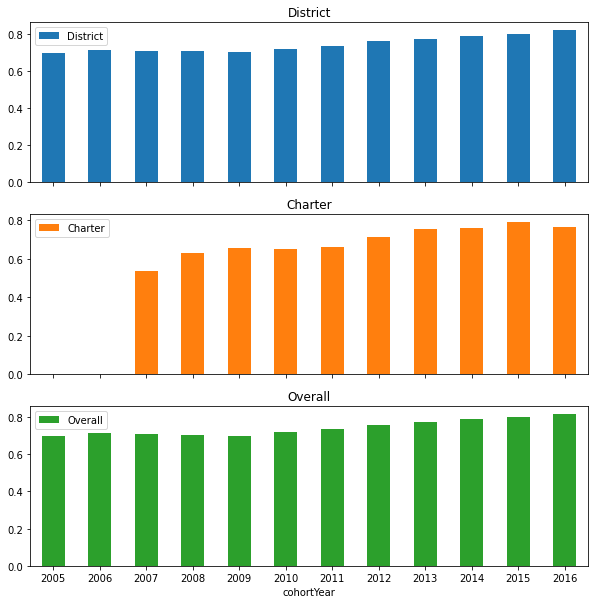

In [14]:
axes = grad_rates.plot.bar(rot=0, subplots=True, figsize = (10,10))

In [15]:
grad_rates_stacked = grad_rates.stack().reset_index().rename(columns={'cohortYear': 'Cohort Year', 
                                                                      'level_1':'Grouping',
                                                                      0:'Grad Rates'}).sort_values(by=['Grouping'])

grad_rates_stacked['Class Of'] = grad_rates_stacked['Cohort Year'] + 4
grad_rates_stacked['label'] = grad_rates_stacked['Cohort Year'].astype('str') + \
    ' \n(Class Of ' + grad_rates_stacked['Class Of'].astype('str') + ')'
grad_rates_stacked['Grad Rates'] = round(pd.to_numeric(grad_rates_stacked['Grad Rates'])*100,2)


In [16]:
grad_rates_stacked['label'].sort_values().unique()

array(['2005 \n(Class Of 2009)', '2006 \n(Class Of 2010)',
       '2007 \n(Class Of 2011)', '2008 \n(Class Of 2012)',
       '2009 \n(Class Of 2013)', '2010 \n(Class Of 2014)',
       '2011 \n(Class Of 2015)', '2012 \n(Class Of 2016)',
       '2013 \n(Class Of 2017)', '2014 \n(Class Of 2018)',
       '2015 \n(Class Of 2019)', '2016 \n(Class Of 2020)'], dtype=object)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


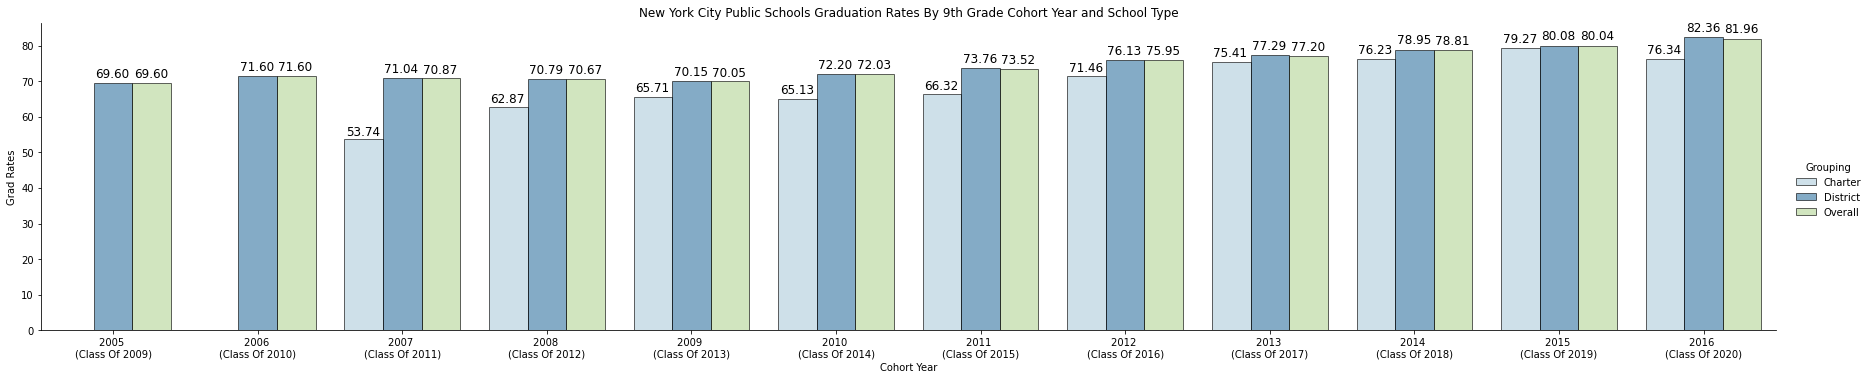

In [17]:
g = sns.catplot(
    data = grad_rates_stacked, kind="bar", 
    x="Cohort Year", y='Grad Rates', hue="Grouping",
    palette="Paired", alpha=.6, height =5, aspect = 5, ec='k')
ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.01,
            p.get_height() * 1.02, 
           '{0:.2f}'.format(p.get_height()),
           color='black', rotation='horizontal', size=12)
ax.set_xticklabels(grad_rates_stacked['label'].sort_values().unique())    
plt.title('New York City Public Schools Graduation Rates By 9th Grade Cohort Year and School Type')
plt.savefig('figures/nyc_overall_grad_rates.png',bbox_inches='tight')

In [18]:
grad_rates['District_YOY']=grad_rates['District'].pct_change()
grad_rates['Charter_YOY']=grad_rates['Charter'].pct_change()
grad_rates['Overall_YOY']=grad_rates['Overall'].pct_change()
grad_rates

,District,Charter,Overall,District_YOY,Charter_YOY,Overall_YOY
cohortYear,,,,,,
2005,0.696010,NaN,0.696010,NaN,NaN,NaN
2006,0.716015,NaN,0.716015,0.028742,NaN,0.028742
2007,0.710426,0.537445,0.708665,-0.007806,NaN,-0.010265
2008,0.707911,0.628731,0.706679,-0.003539,0.169853,-0.002802
2009,0.701457,0.657068,0.700508,-0.009117,0.045070,-0.008732
2010,0.722039,0.651294,0.720258,0.029341,-0.008788,0.028193
2011,0.737596,0.663203,0.735189,0.021545,0.018286,0.020730
2012,0.761296,0.714588,0.759474,0.032132,0.077480,0.033033
2013,0.772940,0.754094,0.772011,0.015295,0.055284,0.016507


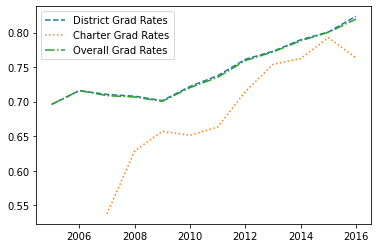

In [19]:
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

plt.plot(grad_rates.District, label = 'District Grad Rates', linestyle='--')
plt.plot(grad_rates.Charter, label = 'Charter Grad Rates', linestyle=':')
plt.plot(grad_rates.Overall, label = 'Overall Grad Rates', linestyle= '-.')
plt.legend()

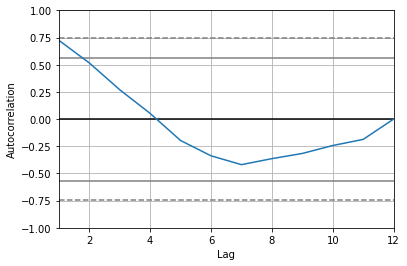

In [20]:
pd.plotting.autocorrelation_plot(grad_rates['District'])

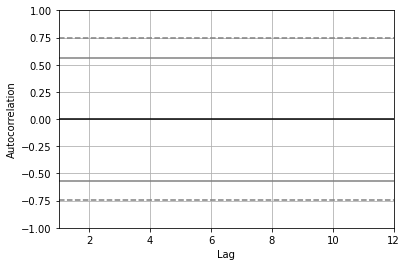

In [21]:
pd.plotting.autocorrelation_plot(grad_rates['Charter'])

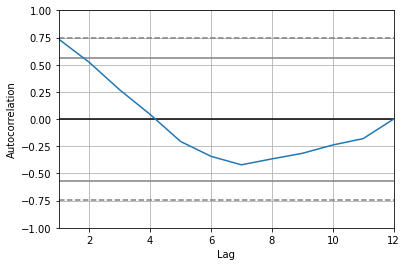

In [22]:
pd.plotting.autocorrelation_plot(grad_rates['Overall'])

In [23]:
geo_dis_rates = pd.DataFrame(round(grads.groupby(['cohortYear', 'geoDis'])['numGrads'].agg('sum')/grads.groupby(['cohortYear', 'geoDis'])['numTotalCohort'].agg('sum')*100,2), 
                             columns=['Grad Rates'])
geo_dis_rates = geo_dis_rates.reset_index().rename(columns = {'cohortYear': 'Cohort Year', 'geoDis':'Geo District'})

In [24]:
geo_dis_rates.head()

,Cohort Year,Geo District,Grad Rates
0,2005,1,64.86
1,2005,2,72.96
2,2005,3,76.57
3,2005,4,79.51
4,2005,5,70.55


In [25]:
geo_dis_rates.pivot(index='Geo District', columns='Cohort Year', values='Grad Rates')

Cohort Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geo District,,,,,,,,,,,,
1,64.86,67.33,63.99,63.91,58.32,55.49,62.92,63.30,63.74,68.87,70.25,70.58
2,72.96,73.98,73.31,73.30,72.93,74.61,75.95,78.44,77.14,79.47,80.62,82.47
3,76.57,76.71,70.76,68.86,66.92,73.83,74.23,75.56,77.83,76.67,79.55,82.41
4,79.51,82.28,85.63,87.84,86.73,86.85,87.15,87.91,89.04,90.19,91.84,87.64
5,70.55,70.32,76.12,73.99,74.24,73.77,73.40,76.38,78.19,77.21,77.57,81.33
6,79.46,76.21,73.99,70.06,66.58,70.28,71.10,72.65,71.98,79.23,79.86,81.89
7,63.00,68.16,64.19,63.27,59.06,62.68,64.69,68.55,67.28,68.28,72.38,73.54
8,47.34,53.00,57.11,45.49,48.15,53.34,53.72,60.02,60.74,63.40,64.28,68.34
9,75.20,73.11,69.50,70.41,68.60,68.54,71.88,74.18,76.12,74.84,76.57,80.46


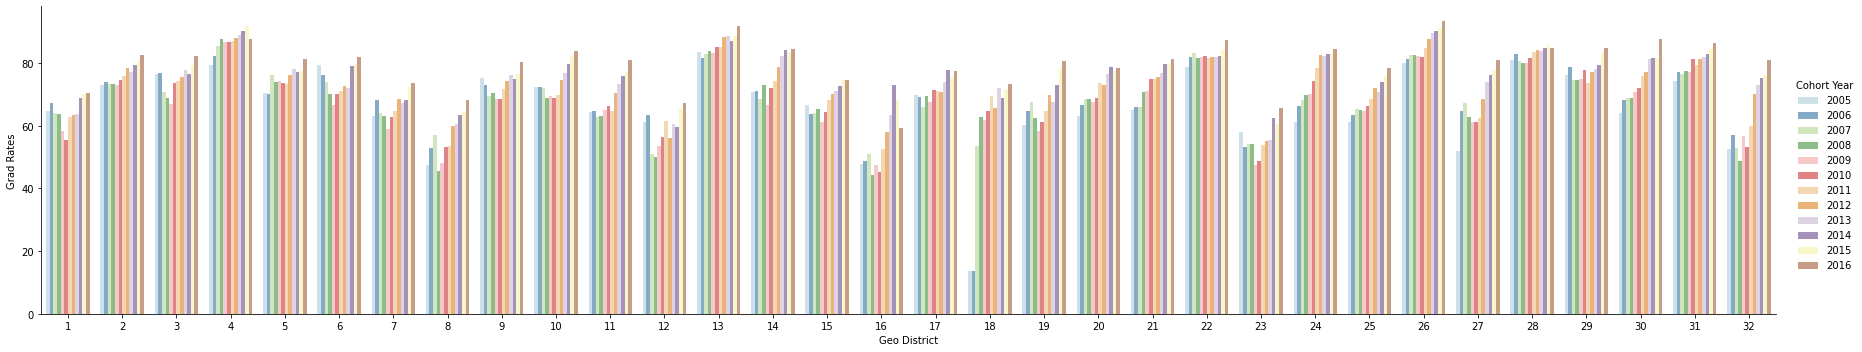

In [26]:
g = sns.catplot(
    data = geo_dis_rates, kind="bar", 
    x="Geo District", y='Grad Rates', hue="Cohort Year",
    palette="Paired", alpha=.6, height =5, aspect = 5)

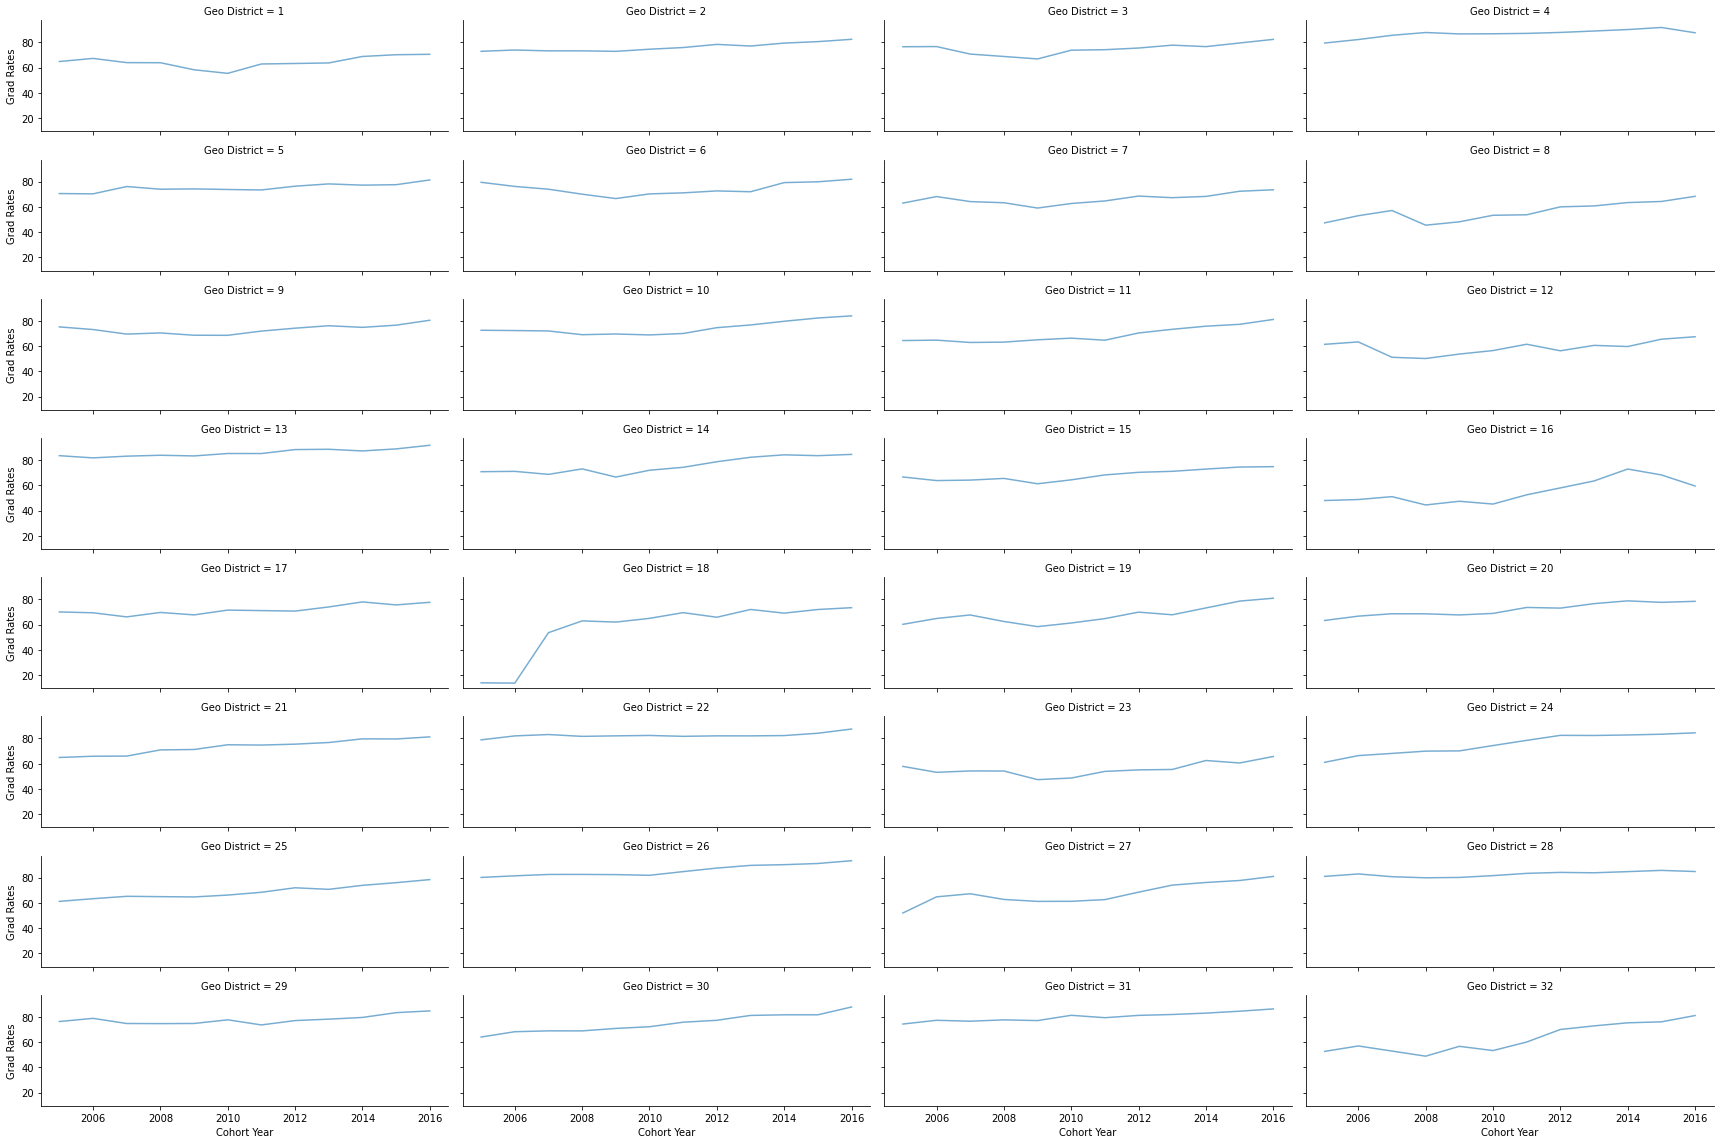

In [27]:
g = sns.FacetGrid(data=geo_dis_rates, col="Geo District", col_wrap = 4, height=2, aspect = 3)
g.map(sns.lineplot, 'Cohort Year', 'Grad Rates', alpha=.6)

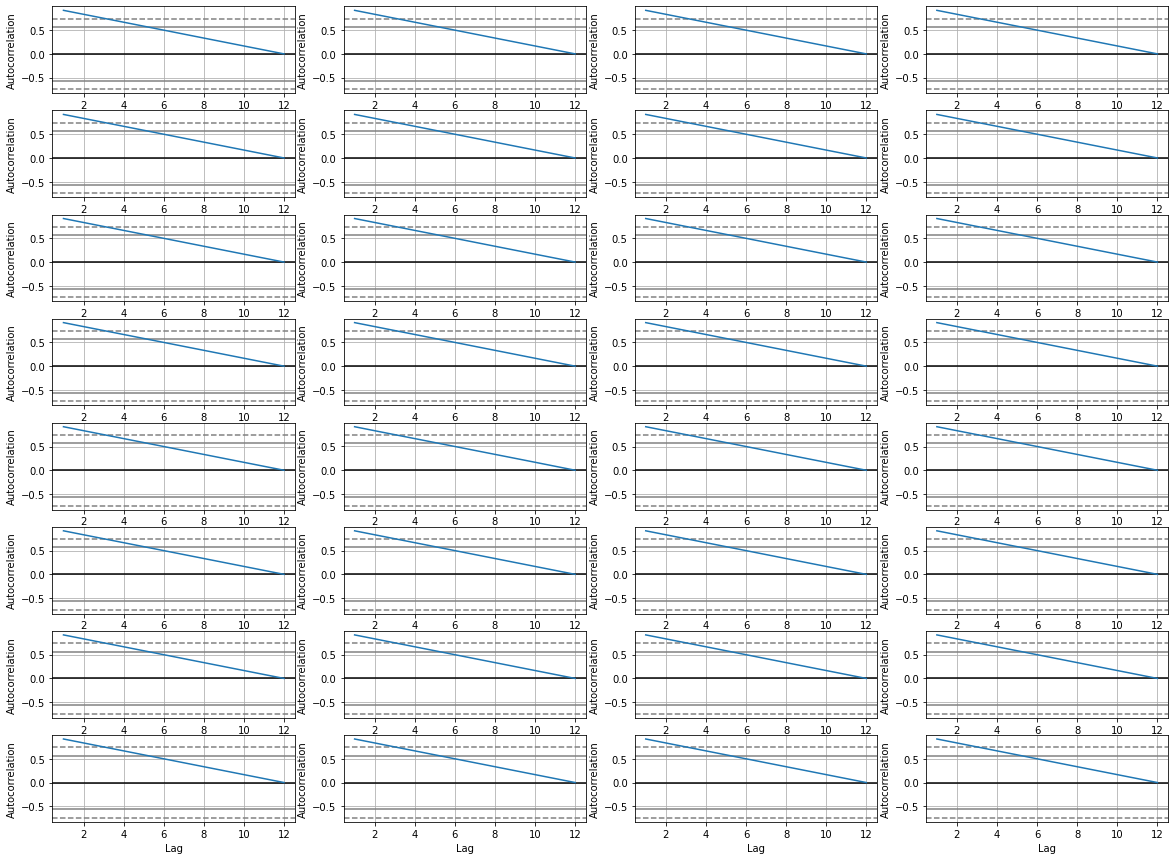

In [28]:
fig, axes = plt.subplots(8,4,figsize=(20,15))
pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==1], ax=axes[0,0])
pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==2], ax=axes[0,1])
pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==3], ax=axes[0,2])
pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==4], ax=axes[0,3])

pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==5], ax=axes[1,0])
pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==6], ax=axes[1,1])
pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==7], ax=axes[1,2])
pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==8], ax=axes[1,3])

pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==9], ax=axes[2,0])
pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==10], ax=axes[2,1])
pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==11], ax=axes[2,2])
pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==12], ax=axes[2,3])

pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==13], ax=axes[3,0])
pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==14], ax=axes[3,1])
pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==15], ax=axes[3,2])
pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==16], ax=axes[3,3])

pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==17], ax=axes[4,0])
pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==18], ax=axes[4,1])
pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==19], ax=axes[4,2])
pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==20], ax=axes[4,3])

pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==21], ax=axes[5,0])
pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==22], ax=axes[5,1])
pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==23], ax=axes[5,2])
pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==24], ax=axes[5,3])

pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==25], ax=axes[6,0])
pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==26], ax=axes[6,1])
pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==27], ax=axes[6,2])
pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==28], ax=axes[6,3])

pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==29], ax=axes[7,0])
pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==30], ax=axes[7,1])
pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==31], ax=axes[7,2])
pd.plotting.autocorrelation_plot(geo_dis_rates[geo_dis_rates['Geo District']==32], ax=axes[7,3])


#### EDA Demographics Data

In [29]:
demo.columns

Index(['dbn', 'enrollment', 'gr9', 'gr10', 'gr11', 'gr12', 'female',
       'pctFemale', 'male', 'pctMale', 'asian', 'pctAsian', 'black',
       'pctBlack', 'hispanic', 'pctHispanic', 'white', 'pctWhite', 'swd',
       'pctSwd', 'ell', 'pctEll', 'poverty', 'pctPoverty', 'sqrYear'],
      dtype='object')

In [30]:
demo.head()

,dbn,enrollment,gr9,gr10,gr11,gr12,female,pctFemale,male,pctMale,asian,pctAsian,black,pctBlack,hispanic,pctHispanic,white,pctWhite,swd,pctSwd,ell,pctEll,poverty,pctPoverty,sqrYear
0,01M015,176,0,0,0,0,83,0.471591,93,0.528409,9,0.051136,57,0.323864,105,0.596591,2,0.011364,60,0.340909,16,0.090909,149,0.8465909361839294,2016
1,01M015,178,0,0,0,0,83,0.466292,95,0.533708,14,0.078652,51,0.286517,105,0.589888,4,0.022472,51,0.286517,12,0.067416,152,0.8539325594902039,2017
2,01M015,190,0,0,0,0,99,0.521053,91,0.478947,20,0.105263,52,0.273684,110,0.578947,6,0.031579,49,0.257895,8,0.042105,161,0.8473684191703796,2018
3,01M015,174,0,0,0,0,85,0.488506,89,0.511494,24,0.137931,48,0.275862,95,0.545977,6,0.034483,39,0.224138,8,0.045977,147,0.8448275923728943,2019
4,01M015,190,0,0,0,0,94,0.494737,96,0.505263,27,0.142105,56,0.294737,96,0.505263,9,0.047368,44,0.231579,17,0.089474,155,0.8157894611358643,2020


In [33]:
dt = demo.merge(grads, right_on = ['dbn', 'sqrYear'], left_on = ['dbn', 'sqrYear'])

In [34]:
dt.head()

,dbn,enrollment,gr9,gr10,gr11,gr12,female,pctFemale,male,pctMale,asian,pctAsian,black,pctBlack,hispanic,pctHispanic,white,pctWhite,swd,pctSwd,ell,pctEll,poverty,pctPoverty,sqrYear,schoolName,cohortYear,cohort,numTotalCohort,numGrads,pctGrad,geoDis,type,desc,censusTract,adminDis
0,01M292,185,42,49,37,32,68,0.367568,117,0.632432,22,0.118919,49,0.264865,106,0.572973,6,0.032432,64,0.345946,26,0.140541,163,0.8810811042785645,2016,ORCHARD COLLEGIATE ACADEMY,2012,4 year August,44,24.0,0.545455,1,General Academic,High school,201.0,01
1,01M292,140,40,35,31,34,53,0.378571,87,0.621429,21,0.150000,34,0.242857,77,0.550000,7,0.050000,38,0.271429,20,0.142857,128,0.9142857193946838,2017,ORCHARD COLLEGIATE ACADEMY,2013,4 year August,36,25.0,0.694444,1,General Academic,High school,201.0,01
2,01M292,171,72,40,30,29,81,0.473684,90,0.526316,19,0.111111,43,0.251462,97,0.567251,8,0.046784,41,0.239766,23,0.134503,157,0.9181286692619324,2018,ORCHARD COLLEGIATE ACADEMY,2014,4 year August,29,28.0,0.965517,1,General Academic,High school,201.0,01
3,01M292,197,67,70,35,25,91,0.461929,106,0.538071,19,0.096447,53,0.269036,112,0.568528,6,0.030457,57,0.289340,23,0.116751,163,0.8274111747741699,2019,ORCHARD COLLEGIATE ACADEMY,2015,4 year August,28,25.0,0.892857,1,General Academic,High school,201.0,01
4,01M292,226,65,64,65,32,101,0.446903,125,0.553097,27,0.119469,58,0.256637,127,0.561947,6,0.026549,65,0.287611,21,0.092920,188,0.8318583965301514,2020,ORCHARD COLLEGIATE ACADEMY,2016,4 year August,31,29.0,0.935484,1,General Academic,High school,201.0,01


In [35]:
demoCols = ['enrollment', 'gr9', 'gr10', 'gr11', 'gr12', 'female', 'male', 'asian', 'black',
            'hispanic', 'white',  'swd', 'ell', 'poverty']
demoLong = pd.DataFrame()
for c in demoCols:
    temp = dt[['dbn', 'sqrYear', c]]
    temp['metric']=c
    temp.rename(columns={c:'values'}, inplace=True)
    demoLong = pd.concat([demoLong, temp], axis=0)

demoLong.head()

/home/cusp/yg833/.conda/envs/yelpVE/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/cusp/yg833/.conda/envs/yelpVE/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,dbn,sqrYear,values,metric
0,01M292,2016,185,enrollment
1,01M292,2017,140,enrollment
2,01M292,2018,171,enrollment
3,01M292,2019,197,enrollment
4,01M292,2020,226,enrollment


In [34]:
demoLong['adminDis'] = demoLong['dbn'].str[:2]

In [35]:
demoSummary = pd.DataFrame()
demoSummaryDis = pd.DataFrame()
demoSummaryCharter = pd.DataFrame()

for c in demoCols[1:12]:
    demoSummary[c] = round(demoLong[demoLong['metric']==c].groupby(['sqrYear'])['values'].agg('sum')/demoLong[demoLong['metric']=='enrollment'].groupby(['sqrYear'])['values'].agg('sum')*100,2)
    demoSummaryDis[c] = round(demoLong[(demoLong['metric']==c) & (demoLong['adminDis'] != '84')].groupby(['sqrYear'])['values'].agg('sum')/demoLong[(demoLong['metric']=='enrollment') & (demoLong['adminDis'] != '84')].groupby(['sqrYear'])['values'].agg('sum')*100,2)
    demoSummaryCharter[c] = round(demoLong[(demoLong['metric']==c) & (demoLong['adminDis'] == '84')].groupby(['sqrYear'])['values'].agg('sum')/demoLong[(demoLong['metric']=='enrollment') & (demoLong['adminDis'] == '84')].groupby(['sqrYear'])['values'].agg('sum')*100,2)

In [36]:
demoSummary

,gr9,gr10,gr11,gr12,female,male,asian,black,hispanic,white,swd
sqrYear,,,,,,,,,,,
2016,25.60,24.63,20.24,19.35,49.12,50.88,15.63,29.71,39.67,12.75,16.44
2017,25.17,24.06,20.65,19.17,49.11,50.89,15.60,29.37,39.69,12.73,16.91
2018,24.68,23.71,20.36,19.49,49.16,50.83,15.59,29.03,39.92,12.82,17.33
2019,24.45,23.38,20.43,19.56,49.27,50.73,15.58,28.78,39.91,12.84,17.72
2020,24.60,23.09,20.39,19.67,49.26,50.74,15.63,28.28,40.42,12.84,17.94


In [37]:
demoLong[demoLong['metric']=='enrollment'].groupby(['sqrYear'])['values'].agg('sum')

sqrYear
2016    330952
2017    341300
2018    346309
2019    348144
2020    347607
Name: values, dtype: int64

In [38]:
demoSummaryCharter

,gr9,gr10,gr11,gr12,female,male,asian,black,hispanic,white,swd
sqrYear,,,,,,,,,,,
2016,16.31,13.10,10.23,8.75,48.55,51.45,1.37,53.44,40.62,2.77,19.28
2017,14.71,13.33,10.92,9.59,50.98,49.02,1.58,52.90,40.35,3.08,19.21
2018,14.11,12.85,10.76,9.60,50.85,49.14,1.59,52.87,40.77,2.65,19.57
2019,14.20,13.89,11.39,9.88,50.89,49.11,1.60,54.21,39.22,2.59,19.46
2020,15.09,14.26,11.73,10.22,50.44,49.56,1.66,53.61,40.13,2.40,19.53


In [39]:
demoSummaryDis

,gr9,gr10,gr11,gr12,female,male,asian,black,hispanic,white,swd
sqrYear,,,,,,,,,,,
2016,26.43,25.67,21.15,20.30,49.17,50.83,16.91,27.57,39.59,13.65,16.19
2017,26.30,25.21,21.70,20.20,48.91,51.09,17.12,26.84,39.62,13.77,16.67
2018,25.98,25.05,21.54,20.71,48.95,51.03,17.31,26.09,39.81,14.07,17.06
2019,25.81,24.64,21.64,20.85,49.06,50.94,17.43,25.41,40.00,14.20,17.49
2020,25.96,24.35,21.63,21.02,49.09,50.91,17.63,24.65,40.46,14.34,17.71


#### EDA SQR 

In [40]:
sqr.columns

Index(['dbn', 'sqrEnrollment', 'econNeedInd', 'grd8Ela', 'grd8Math',
       'attdRate', 'pctChronAbs', 'sqrYear', 'pct10PlusYear1',
       'pct10PlusYear1Lowest3rd', 'pct10PlusYear2', 'pct10PlusYear2Lowest3rd',
       'pct10PlusYear3', 'pct10PlusYear3Lowest3rd', 'numYear1',
       'numYear1Lowest3rd', 'numYear2', 'numYear2Lowest3rd', 'numYear3',
       'numYear3Lowest3rd', 'numGradLowest3rd', 'numPERLowest3rd',
       'pctCCPCILowest3rd', 'pctCollegeReadyLowest3rd', 'pctGradLowest3rd',
       'pctPERLowest3rd', 'pctGradLevel1', 'pctGradLevel2', 'pctGradLevel34',
       'numGradLevel1', 'numGradLevel2', 'numGradLevel34'],
      dtype='object')

In [41]:
#sqr_to_link = pd.concat([sqr[['dbn', 'sqrYear', 'numYear1Lowest3rdApprox', 'year1Cohort']].rename(columns={'numYear1Lowest3rdApprox':'lowest3rdInCohort', 'year1Cohort':'cohortYear'}), 
#          sqr[['dbn', 'sqrYear', 'numYear2Lowest3rdApprox', 'year2Cohort']].rename(columns={'numYear2Lowest3rdApprox':'lowest3rdInCohort', 'year2Cohort':'cohortYear'}), 
#          sqr[['dbn', 'sqrYear', 'numYear3Lowest3rdApprox', 'year3Cohort']].rename(columns={'numYear3Lowest3rdApprox':'lowest3rdInCohort', 'year3Cohort':'cohortYear'})], axis=0)
#sqr_to_link = sqr_to_link.sort_values(['dbn','sqrYear', 'cohortYear']).drop_duplicates(subset=['dbn', 'cohortYear'])
#sqr_to_link.drop(columns = ['sqrYear'], inplace=True)
#sqr_to_link = sqr[['dbn', 'numYear3Lowest3rdApprox', 'year3Cohort']].rename(columns={'numYear3Lowest3rdApprox':'lowest3rdInCohort', 'year3Cohort':'cohortYear'})
#sqr_to_link.head()

In [42]:
sqr.head()

,dbn,sqrEnrollment,econNeedInd,grd8Ela,grd8Math,attdRate,pctChronAbs,sqrYear,pct10PlusYear1,pct10PlusYear1Lowest3rd,pct10PlusYear2,pct10PlusYear2Lowest3rd,pct10PlusYear3,pct10PlusYear3Lowest3rd,numYear1,numYear1Lowest3rd,numYear2,numYear2Lowest3rd,numYear3,numYear3Lowest3rd,numGradLowest3rd,numPERLowest3rd,pctCCPCILowest3rd,pctCollegeReadyLowest3rd,pctGradLowest3rd,pctPERLowest3rd,pctGradLevel1,pctGradLevel2,pctGradLevel34,numGradLevel1,numGradLevel2,numGradLevel34
0,01M292,255.0,0.832,2.18,2.06,0.766,0.568,2015,0.857,0.867,0.568,0.438,0.700,0.333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250,0.281,1.750,0.152,NaN,NaN,NaN,NaN,NaN,NaN
1,01M448,304.0,0.812,2.27,2.37,0.880,0.347,2015,0.889,0.800,0.872,0.720,0.742,0.533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.543,0.174,3.130,0.429,NaN,NaN,NaN,NaN,NaN,NaN
2,01M450,666.0,0.610,2.66,2.63,0.938,0.165,2015,0.946,0.828,0.870,0.818,0.824,0.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.368,0.316,2.737,0.625,NaN,NaN,NaN,NaN,NaN,NaN
3,01M509,363.0,0.767,2.28,2.09,0.768,0.647,2015,0.652,0.619,0.627,0.542,0.583,0.407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043,0.000,0.745,0.107,NaN,NaN,NaN,NaN,NaN,NaN
4,01M539,1735.0,0.257,3.50,3.53,0.952,0.130,2015,0.975,0.912,0.984,0.945,0.984,0.962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Full Dataset

In [43]:
dt = sqr.merge(dt, right_on = ['sqrYear', 'dbn'], left_on = ['sqrYear', 'dbn'])
# dt = dt.merge(sqr_to_link, right_on = ['cohortYear', 'dbn'], left_on = ['cohortYear', 'dbn'] )

In [44]:
#sqrCols = ['sqrEnrollment', 'grd8Ela', 'grd8Math', 'attdRate',
#       'pctChronAbs', 'pct10PlusYear1', 'pct10PlusYear1Lowest3rd',
#       'pct10PlusYear2', 'pct10PlusYear2Lowest3rd', 'pct10PlusYear3',
#       'pct10PlusYear3Lowest3rd', 'pctGradLowest3rd']
#for c in sqrCols:
#    g = sns.FacetGrid(dt, col='sqrYear', palette='Paired')
#    g.map(plt.hist, c)

In [45]:
dt.columns

Index(['dbn', 'sqrEnrollment', 'econNeedInd', 'grd8Ela', 'grd8Math',
       'attdRate', 'pctChronAbs', 'sqrYear', 'pct10PlusYear1',
       'pct10PlusYear1Lowest3rd', 'pct10PlusYear2', 'pct10PlusYear2Lowest3rd',
       'pct10PlusYear3', 'pct10PlusYear3Lowest3rd', 'numYear1',
       'numYear1Lowest3rd', 'numYear2', 'numYear2Lowest3rd', 'numYear3',
       'numYear3Lowest3rd', 'numGradLowest3rd', 'numPERLowest3rd',
       'pctCCPCILowest3rd', 'pctCollegeReadyLowest3rd', 'pctGradLowest3rd',
       'pctPERLowest3rd', 'pctGradLevel1', 'pctGradLevel2', 'pctGradLevel34',
       'numGradLevel1', 'numGradLevel2', 'numGradLevel34', 'enrollment', 'gr9',
       'gr10', 'gr11', 'gr12', 'female', 'pctFemale', 'male', 'pctMale',
       'asian', 'pctAsian', 'black', 'pctBlack', 'hispanic', 'pctHispanic',
       'white', 'pctWhite', 'swd', 'pctSwd', 'ell', 'pctEll', 'poverty',
       'pctPoverty', 'schoolName', 'cohortYear', 'cohort', 'numTotalCohort',
       'numGrads', 'pctGrad', 'geoDis', 'type', 'des

In [46]:
gr9dt = dt[['dbn', 'sqrYear', 'pct10PlusYear1','pct10PlusYear1Lowest3rd']]
gr10dt = dt[['dbn', 'sqrYear', 'pct10PlusYear2','pct10PlusYear2Lowest3rd']]
gr11dt = dt[['dbn', 'sqrYear', 'pct10PlusYear3','pct10PlusYear3Lowest3rd']]

In [47]:
gr9dt.rename(columns={'pct10PlusYear1':'pct10PlusYear1CohortApprox','pct10PlusYear1Lowest3rd':'pct10PlusLowest3rdYear1CohortApprox'}, inplace=True)
gr10dt.rename(columns={'pct10PlusYear2':'pct10PlusYear2CohortApprox','pct10PlusYear2Lowest3rd':'pct10PlusYear2CohortLowest3rdApprox'}, inplace=True)
gr11dt.rename(columns={'pct10PlusYear3':'pct10PlusYear3CohortApprox','pct10PlusYear3Lowest3rd':'pct10PlusYear3CohortLowest3rdApprox'}, inplace=True)

In [48]:
gr9dt['cohortYear'] = gr9dt['sqrYear']
gr10dt['cohortYear'] = gr10dt['sqrYear'] - 1
gr11dt['cohortYear'] = gr11dt['sqrYear'] - 2

/home/cusp/yg833/.conda/envs/yelpVE/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/cusp/yg833/.conda/envs/yelpVE/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/cusp/yg833/.conda/envs/yelpVE/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [49]:
gr9dt.drop(columns = ['sqrYear'], inplace=True)
gr10dt.drop(columns = ['sqrYear'], inplace=True)
gr11dt.drop(columns = ['sqrYear'], inplace=True)

/home/cusp/yg833/.conda/envs/yelpVE/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [50]:
grdt = gr9dt.merge(gr10dt, how='outer', right_on = ['dbn', 'cohortYear'],
                   left_on = ['dbn', 'cohortYear']).merge(gr11dt, how='outer', right_on = ['dbn', 'cohortYear'],
                                                          left_on = ['dbn', 'cohortYear'])
dt = dt.merge(grdt, how='left', right_on = ['dbn', 'cohortYear'], left_on = ['dbn', 'cohortYear'])

In [51]:
dt['pctCohortLowest3rd'] = dt['numGradLowest3rd']/dt['numTotalCohort']

In [52]:
dt.columns

Index(['dbn', 'sqrEnrollment', 'econNeedInd', 'grd8Ela', 'grd8Math',
       'attdRate', 'pctChronAbs', 'sqrYear', 'pct10PlusYear1',
       'pct10PlusYear1Lowest3rd', 'pct10PlusYear2', 'pct10PlusYear2Lowest3rd',
       'pct10PlusYear3', 'pct10PlusYear3Lowest3rd', 'numYear1',
       'numYear1Lowest3rd', 'numYear2', 'numYear2Lowest3rd', 'numYear3',
       'numYear3Lowest3rd', 'numGradLowest3rd', 'numPERLowest3rd',
       'pctCCPCILowest3rd', 'pctCollegeReadyLowest3rd', 'pctGradLowest3rd',
       'pctPERLowest3rd', 'pctGradLevel1', 'pctGradLevel2', 'pctGradLevel34',
       'numGradLevel1', 'numGradLevel2', 'numGradLevel34', 'enrollment', 'gr9',
       'gr10', 'gr11', 'gr12', 'female', 'pctFemale', 'male', 'pctMale',
       'asian', 'pctAsian', 'black', 'pctBlack', 'hispanic', 'pctHispanic',
       'white', 'pctWhite', 'swd', 'pctSwd', 'ell', 'pctEll', 'poverty',
       'pctPoverty', 'schoolName', 'cohortYear', 'cohort', 'numTotalCohort',
       'numGrads', 'pctGrad', 'geoDis', 'type', 'des

In [53]:
dt.head()

,dbn,sqrEnrollment,econNeedInd,grd8Ela,grd8Math,attdRate,pctChronAbs,sqrYear,pct10PlusYear1,pct10PlusYear1Lowest3rd,pct10PlusYear2,pct10PlusYear2Lowest3rd,pct10PlusYear3,pct10PlusYear3Lowest3rd,numYear1,numYear1Lowest3rd,numYear2,numYear2Lowest3rd,numYear3,numYear3Lowest3rd,numGradLowest3rd,numPERLowest3rd,pctCCPCILowest3rd,pctCollegeReadyLowest3rd,pctGradLowest3rd,pctPERLowest3rd,pctGradLevel1,pctGradLevel2,pctGradLevel34,numGradLevel1,numGradLevel2,numGradLevel34,enrollment,gr9,gr10,gr11,gr12,female,pctFemale,male,pctMale,asian,pctAsian,black,pctBlack,hispanic,pctHispanic,white,pctWhite,swd,pctSwd,ell,pctEll,poverty,pctPoverty,schoolName,cohortYear,cohort,numTotalCohort,numGrads,pctGrad,geoDis,type,desc,censusTract,adminDis,pct10PlusYear1CohortApprox,pct10PlusLowest3rdYear1CohortApprox,pct10PlusYear2CohortApprox,pct10PlusYear2CohortLowest3rdApprox,pct10PlusYear3CohortApprox,pct10PlusYear3CohortLowest3rdApprox,pctCohortLowest3rd
0,01M292,160.0,0.881,2.312,2.091,0.811,0.524,2016,0.813,0.800,0.806,0.800,0.615,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.348,0.333,NaN,NaN,NaN,NaN,NaN,NaN,185,42,49,37,32,68,0.367568,117,0.632432,22,0.118919,49,0.264865,106,0.572973,6,0.032432,64,0.345946,26,0.140541,163,0.8810811042785645,ORCHARD COLLEGIATE ACADEMY,2012,4 year August,44,24.0,0.545455,1,General Academic,High school,201.0,01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M448,343.0,0.771,2.602,2.539,0.908,0.256,2016,0.935,0.813,0.904,0.786,0.872,0.773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.286,0.095,0.524,0.308,NaN,NaN,NaN,NaN,NaN,NaN,343,120,105,69,49,148,0.431487,195,0.568513,96,0.279883,93,0.271137,142,0.413994,10,0.029155,68,0.198251,47,0.137026,303,0.8833819031715393,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2012,4 year August,66,50.0,0.757576,1,General Academic,High school,202.0,01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M450,386.0,0.591,2.965,2.927,0.927,0.198,2016,0.870,0.806,0.957,0.900,0.842,0.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.833,0.389,0.833,0.500,NaN,NaN,NaN,NaN,NaN,NaN,677,103,96,97,90,334,0.493353,343,0.506647,73,0.107829,139,0.205318,361,0.533235,81,0.119645,191,0.282127,6,0.008863,471,0.695716381072998,EAST SIDE COMMUNITY SCHOOL,2012,4 year August,90,76.0,0.844444,1,General Academic,Secondary School,3400.0,01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M539,655.0,0.278,3.718,3.831,0.940,0.146,2016,0.986,1.000,0.962,0.941,0.973,0.964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1753,143,139,185,188,885,0.504849,868,0.495151,579,0.330291,153,0.087279,198,0.112949,732,0.417570,82,0.046777,7,0.003993,478,0.27267542481422424,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",2012,4 year August,186,186.0,1.000000,1,General Academic,K-12 all grades,2201.0,01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M696,535.0,0.376,3.901,3.988,0.942,0.153,2016,1.000,1.000,0.986,0.975,0.983,0.938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535,147,139,119,130,315,0.588785,220,0.411215,122,0.228037,86,0.160748,88,0.164486,228,0.426168,5,0.009346,0,0.000000,222,0.4149532616138458,BARD HIGH SCHOOL EARLY COLLEGE,2012,4 year August,131,129.0,0.984733,1,General Academic,High school,1002.0,01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


AttributeError: module 'seaborn' has no attribute 'histplot'

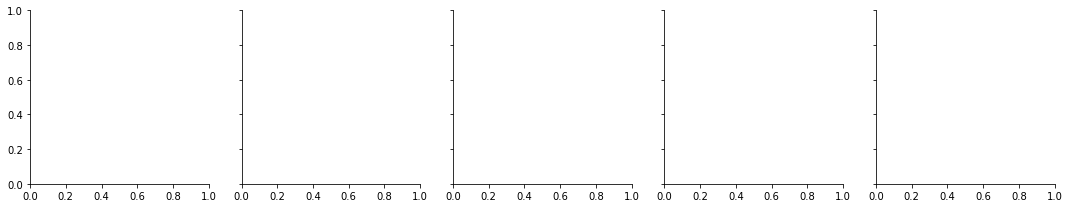

In [54]:
g = sns.FacetGrid(dt, col = 'sqrYear')
g.map(sns.histplot, "pctGrad")

In [ ]:
g = sns.FacetGrid(dt, col = 'sqrYear')
g.map(sns.histplot, "pctCohortLowest3rd")

In [ ]:
g = sns.FacetGrid(dt, col="sqrYear", row = "geoDis")
g.map(sns.scatterplot, "pctCohortLowest3rd", "pctGrad", alpha=.7)
g.add_legend()

In [ ]:
sns.pairplot(dt[['sqrYear', 'pctSwd', 'pctEll',
       'pctPoverty', 'grd8Ela', 'grd8Math',
       'attdRate', 'pctChronAbs', 'pct10PlusYear1',
       'pct10PlusYear2',  'pct10PlusYear3', 'pctGradLowest3rd']], 
             hue='sqrYear', diag_kind='hist')

In [ ]:
dt.to_csv('data/clean/full_dt.csv', index=False)

In [ ]:
dt.columns